<a href="https://colab.research.google.com/github/carlos-jaramillo/sales_forecast/blob/main/sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desarrollado por: *Martín Jaramillo*

* Fecha de creación: 18/02/2023
* Fecha de actualización: 19/03/2023

### Descripción.
* sales_forecast actualización 5



In [2]:
import matplotlib.pyplot as plt


In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import pandas as pd
filename="/content/drive/MyDrive/sales_predictions.csv"
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df["Item_Identifier"].unique

<bound method Series.unique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

In [7]:
#cuantas filas y columnas hay
df.shape

(8523, 12)

In [8]:
#tipos de datos en cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#Verificación de duplicados
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [10]:
df.duplicated().sum()

0

In [11]:
#Verificación datos faltantes
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [13]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
#Método interpolate() para llenar valores NA en la columna "Item_Weight"
df["Item_Weight"].interpolate(method ='linear', limit_direction ='forward', inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#Método "ffill" para rellenar datos en columna "Outlet_Size"
df['Outlet_Size'] = df['Outlet_Size'].fillna(method='ffill')


In [18]:
#grouped = df.groupby(["Outlet_Type", "Outlet_Location_Type"])


In [19]:
#df["Outlet_Size"] = grouped["Outlet_Size"].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [20]:
#df["Outlet_Size"].fillna("Unknown", inplace=True)

In [21]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
  df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
#Arreglando datos categóricos inconsistentes.
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('LF', "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('low fat', "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('reg', "Regular")

In [24]:
#Obteniendo min, max, y media de diversas columnas numéricas
print("El mínimo es",df["Item_Weight"].min())
print("El máximo es",df["Item_Weight"].max()) 
print("La media es", df["Item_Weight"].mean())

El mínimo es 4.555
El máximo es 21.35
La media es 12.831222280887012


In [25]:
print("El mínimo es",df["Item_Visibility"].min())
print("El máximo es",df["Item_Visibility"].max()) 
print("La media es", df["Item_Visibility"].mean())

El mínimo es 0.0
El máximo es 0.328390948
La media es 0.06613202877895108


In [26]:
print("El mínimo es",df["Item_MRP"].min())
print("El máximo es",df["Item_MRP"].max()) 
print("La media es", df["Item_MRP"].mean())

El mínimo es 31.29
El máximo es 266.8884
La media es 140.9927819781767


In [27]:
print("El mínimo es",df["Outlet_Establishment_Year"].min())
print("El máximo es",df["Outlet_Establishment_Year"].max()) 
print("La media es", df["Outlet_Establishment_Year"].mean())

El mínimo es 1985
El máximo es 2009
La media es 1997.8318667135984


In [28]:
print("El mínimo es",df["Item_Outlet_Sales"].min())
print("El máximo es",df["Item_Outlet_Sales"].max()) 
print("La media es", df["Item_Outlet_Sales"].mean())

El mínimo es 33.29
El máximo es 13086.9648
La media es 2181.288913575032


In [29]:
#heatmap
corr = df.corr()

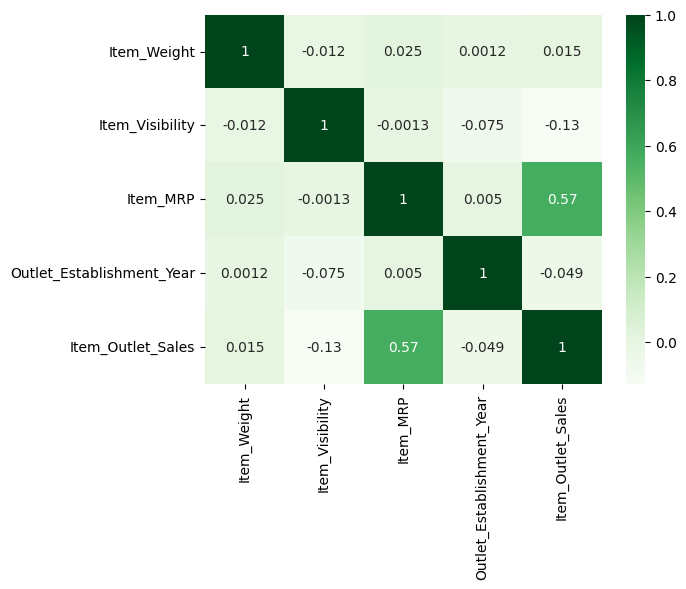

In [30]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

Relaciones entre variables vista en el heatmap:

De 1 a 0.7 se considera "fuerte".

Entre 0,5 y 0,7 se considera “moderado”.

Entre 0,3 y 0,5 se considera una correlación “baja”.

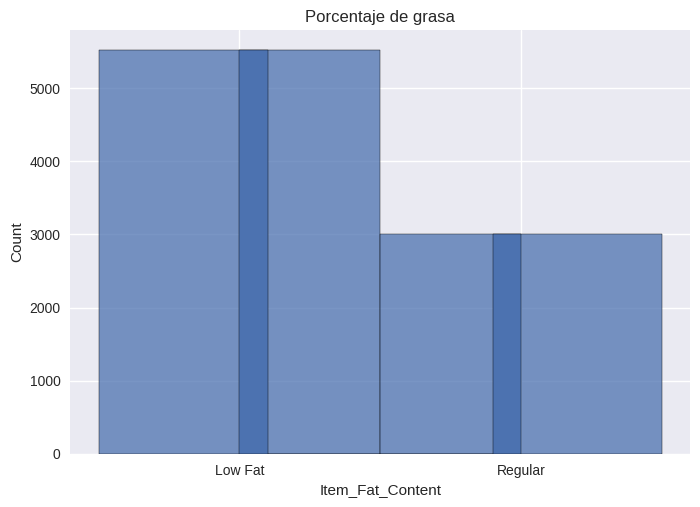

In [72]:
#Histograma de Item_Fat_Content
sns.histplot(data=df, x="Item_Fat_Content")
plt.title("Porcentaje de grasa")
plt.xlabel("Item_Fat_Content")
plt.ylabel("Count")
df["Item_Fat_Content"].hist(edgecolor="black");

In [32]:
#Análisis: Hay más productos "Low Fat", supongo que por el tema de que es mejor visto que lo regular en general.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

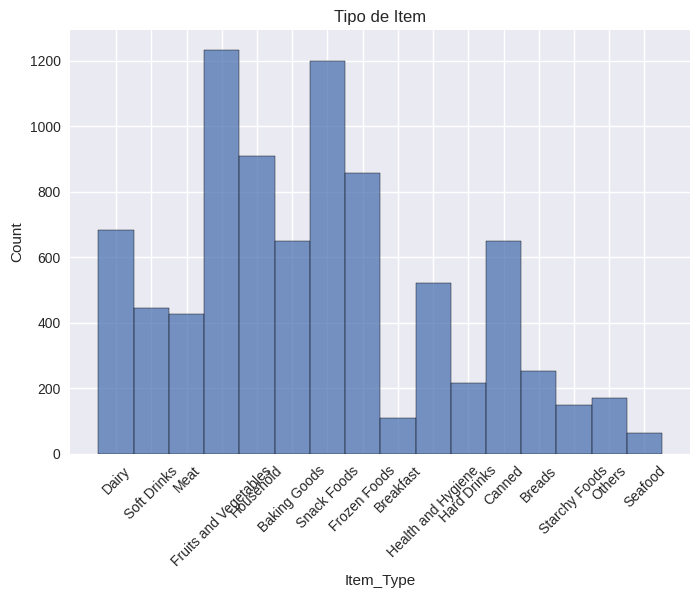

In [33]:
#Histograma de Item_Type
sns.histplot(data=df, x="Item_Type")
plt.title("Tipo de Item")
plt.xlabel("Item_Type")
plt.ylabel("Count")

plt.xticks(rotation = 45)


In [34]:
#Análisis: Cantidad de tipos de alimentos vendidos

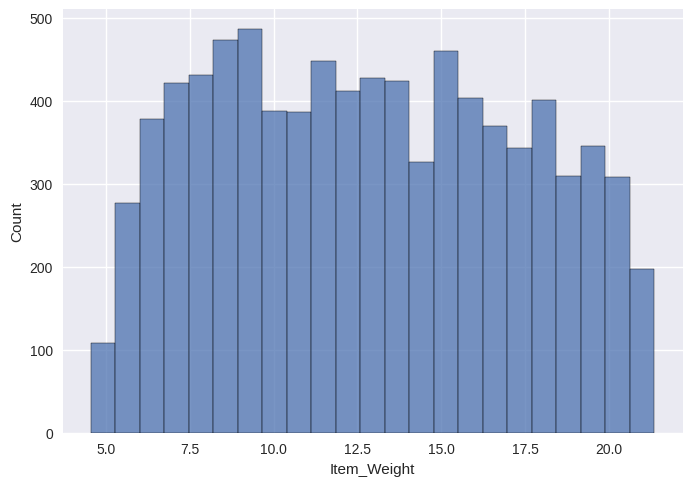

In [35]:
#Item_Weight
sns.histplot(df["Item_Weight"])
plt.show()

In [36]:
#Análisis: Peso de cada item, para ver que tan pesados son, nada importante al análisis.

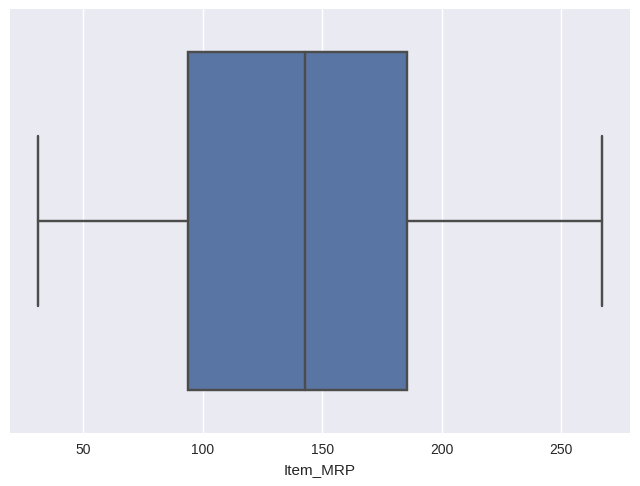

In [37]:
#Item_MRP
sns.boxplot(x=df["Item_MRP"])
plt.show()


In [38]:
#Análisis: Hacer algo más visible donde se encuentra ubicado el valor de la media de la columna "Item_MRP"

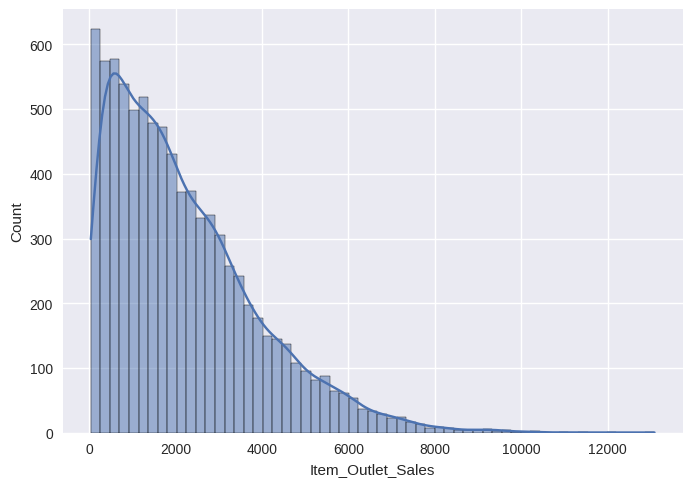

In [39]:
#Item_Outlet_Sales
sns.histplot(df["Item_Outlet_Sales"], kde=True)
plt.show()


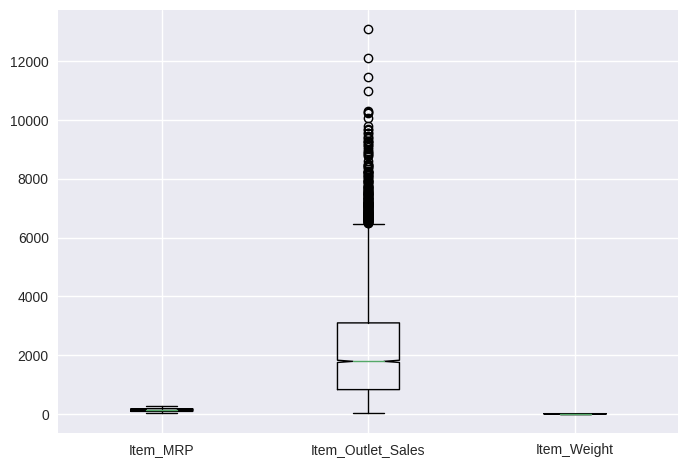

In [40]:
#boxplot diversity stadistics
MRP = df['Item_MRP']
ventas = df['Item_Outlet_Sales']
peso = df["Item_Weight"]

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([MRP,ventas,peso], notch = True, labels=['Item_MRP', 'Item_Outlet_Sales', "Item_Weight"]);
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [42]:
#Train Test Split
X = df.drop(columns=["Item_Outlet_Sales", "Item_Identifier","Item_Visibility","Outlet_Identifier", "Outlet_Establishment_Year"])
y = df["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [43]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [44]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [45]:
# Numerical pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [46]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [47]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb824136730>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb824136ac0>)])

In [48]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb824136730>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb824136ac0>)])

In [49]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [50]:
#results on array NumPy
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 30)




array([[ 0.7862131 ,  1.82810922,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.53804912,  0.60336888,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.11620136,  0.24454056,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.06821761,  1.52302674,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.68862755, -0.38377708,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.7862131 , -0.73836105,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

1) La primera tarea será crear un modelo de regresión lineal para predecir las ventas.

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression()

In [53]:
reg.fit(X_train_processed,y_train)

LinearRegression()

In [54]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.5604189652553431


In [55]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.5659478615469455


In [56]:
train_preds = reg.predict(X_train_processed)

In [57]:
test_preds = reg.predict(X_test_processed)

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

0.5604189652553431
0.5659478615469455


In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_train)
print(mse_test)

1300920.6008767623
1197539.9917158869


In [62]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

1140.579063842907
1094.321703940796


2) La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf = RandomForestRegressor(random_state = 42)

In [65]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [66]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [67]:
rf.predict(X_test_processed)

array([ 883.463336  ,  917.37253   ,  691.679646  , ..., 4331.03343867,
       2059.039764  , 2265.604214  ])

In [68]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9350428625751178
0.5327586815956236


In [69]:
rf_150 = RandomForestRegressor(n_estimators = 150, random_state = 42)
# Ajusten el modelo
rf_150.fit(X_train_processed, y_train)
# Obtengan las puntuaciones
rf_150_train_score = rf_150.score(X_train_processed, y_train)
rf_150_test_score = rf_150.score(X_test_processed, y_test)
print(rf_150_train_score)
print(rf_150_test_score)


0.9359241972066749
0.5341557349095953


In [70]:
train1_preds = rf_150.predict(X_train_processed)
test1_preds = rf_150.predict(X_test_processed)

In [71]:
rmse1_train = np.sqrt(mean_squared_error(y_train, train1_preds))
rmse1_test = np.sqrt(mean_squared_error(y_test, test1_preds))
print(rmse1_train)
print(rmse1_test)

435.4646944343765
1133.6903223717704


3) Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.

Si acabamos de comparar los dos resultados que tuvimos, solo con la regresion linear y el bosque de regresión, prefiero usar el bosque de regresión, primero ya que probablemente IA no esté muy bien implementada, tuve raices de errores cuadráticos medios muy altos, tanto en la regresión linear, cómo en el bosque de regresión. Esto debido a mi indecisión de no eliminar columnas en la base de datos, pero sí, tal vez eso puedo afectar al rendimiento del modelo. Pero aún así escojo el bosque de regresión, ya que al ser bastantes modelos que buscan la mejor solución, muchos de los problemas que tuve bajaron considerablemente, den la regresión linear, tuve estos valores:

1140.579063842907
1094.321703940796

Son valores muy altos, que se redujeron a estos cuando hice el bosque de regresión:

435.4646944343765

1133.6903223717704

Si bien siguen siendo números muy altos, son más pequeños que los números obtenidos en la regresión linear.

Por tanto recomiendo mucho el uso del modelo de bosque de regresión.